In [1]:
! pip install numpy
import numpy as np
np.__version__ #checks proper installation of package

'1.24.2'

In [2]:
import cv2 as cv

#a 1 has been attached at the end of every object, to avoid any confusion between this code and the Monte Carlo one
#the comments have not been altered in terms of names, as they are still referencing the correct objects

data1 = cv.VideoCapture("ski_drop_low.mp4") 
#using ski drop low as the higher resolution version lengthens processing times

#defining the columns of the empty matrix:

framecount1 = int(data1.get(cv.CAP_PROP_FRAME_COUNT))
framewidth1 = int(data1.get(cv.CAP_PROP_FRAME_WIDTH))
frameheight1 = int(data1.get(cv.CAP_PROP_FRAME_HEIGHT))

#creating a buffer in order to be able to insert the information from the video into it:

buffer1 = np.empty((framecount1, frameheight1, framewidth1, 3), np.dtype('uint8')) #8-bit unsigned integer, desired output (due to the RGB values)
#the buffer stores information temporarily

##TURNING RGB TO GREYSCALE

#creating a buffer in order to be able to insert the information from the video into it:

buffer_grey1 = np.empty((framecount1, frameheight1, framewidth1), np.dtype('uint8'))

fc = 0
ret = True

while (fc < framecount1 and ret):
    ret, buffer1[fc] = data1.read()
    buffer_grey1[fc] = cv.cvtColor(buffer1[fc], cv.COLOR_BGR2GRAY) #converts each frame to greyscale
    fc += 1

data1.release()

#print(buffer.shape) #(454 [frames], 540 [width], 960 [height], 3 [RGB])
#print(buffer)

print(buffer_grey1.shape)
print(buffer_grey1)

(454, 540, 960)
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [3]:
#organizing the variables for reshaping:

frames = buffer1.shape[0]
height = buffer1.shape[1]
width = buffer1.shape[2]
RGB = buffer1.shape[3]

#X = np.reshape(buffer, (frames, height*width, RGB)) #3-D matrix - this was useful for the RGB and hexadecimal trials
X_grey1 = np.reshape(buffer_grey1, (frames, height*width)) #2-D matrix

print(X_grey1.shape)
print(X_grey1)
#matrix has now been reshaped, the last column has been removed (RGB)

(454, 518400)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [4]:
#rows were stacked, such that we have a TIME X SPACE matrix (frames x height*width)
#take the transpose (not the Hermitian, as there are no complex values)

XT_grey1 = np.transpose(X_grey1)

print(XT_grey1.shape)
print(XT_grey1)

(518400, 454)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [5]:
#applying the SVD for the first round - it will run heavy
#to run SVD - XT_grey will be split into U, S, and VT matrices

#U,S,VT = np.linalg.svd(XT_grey, full_matrices=True) #"True" condition returns the full SVD (however, too heavy to run)
U1,S1,VT1 = np.linalg.svd(XT_grey1, full_matrices=False) #"False" condition returns a reduced SVD, allowing the program to run
#the "False" condition truncates the bottom rows that are only 0

np.save('U1.npy', U1)
np.save('S1.npy', S1)
np.save('VT1.npy', VT1)

#checking to see whether the original matrix may be reconstructed:

XT_grey_remake1 = (U1 @ np.diag(S1) @ VT1)
print(XT_grey_remake1.shape)
print(XT_grey_remake1)

(518400, 454)
[[ 1.47698451e-16  1.79435366e-11  3.50329388e-11 ...  2.52927725e-11
  -8.74749316e-11  8.08945104e-11]
 [-2.61876256e-17  1.13521100e-17 -4.68521631e-11 ... -2.98538532e-11
  -3.01333500e-11 -2.98801202e-11]
 [ 1.22692042e-16  2.13094997e-16  8.27198277e-16 ...  9.08552582e-11
   8.57759353e-11  8.81907483e-11]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [6]:
U1 = np.load("U1.npy")
S1 = np.load("S1.npy")
VT1 = np.load("VT1.npy")

print(U1.shape)
print(S1.shape)
print(VT1.shape)

print(U1)
print(S1)
print(VT1)

(518400, 454)
(454,)
(454, 454)
[[-3.03083635e-16  1.79402933e-15 -2.68177407e-15 ... -1.33804973e-12
   5.56198229e-01  3.64043305e-01]
 [ 4.41743963e-16  2.01423688e-15  2.54819444e-15 ... -1.17609731e-14
  -2.04119190e-03 -8.42745896e-03]
 [-1.29134651e-15  1.07154530e-14  2.01146998e-14 ... -1.32551173e-13
  -1.21556843e-02 -2.38796716e-02]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[1.46988784e+06 5.07098906e+04 3.50397360e+04 2.47165982e+04
 2.13324089e+04 1.82162584e+04 1.50803739e+04 1.30039763e+04
 1.07429398e+04 9.47995260e+03 8.99275535e+03 7.62012821e+03
 7.46394913e+03 7.21102995e+03 6.65602761e+03 6.18489041e+03
 5.94784674e+03 5.81872383e+03 5.50233838e+03 5.23532393e+03
 5.01010706e+03 4.70635889e

In [7]:
##LOW-RANK DECOMPOSITION
#this allows for the identification of the more salient pieces of information

#Eckart-Young-Mirsky theorem:

#computing the rank of the matrix
rank_XT1 = np.linalg.matrix_rank(XT_grey1)

print("Rank of matrix: ", rank_XT1)
#print("S = ", S)

#calculating the p-rank: (to avoid redundancy with S)

p = 0
energy = 0

while energy <= 0.99999:
    energy = energy + (S1[p]**2 / np.sum(np.diag(S1)**2))
    p += 1

print("Optimal p-rank: ", p)

Rank of matrix:  452
Optimal p-rank:  168


In [8]:
#take the transpose (Hermitian) of U in order to run the low-rank SVD: 

def lowrankSVD(p: 'int', U1: 'np.ndarry', A1):
    return np.dot(np.transpose(U1[:, :p]), A1)

XT_greys1 = lowrankSVD(168, U1, XT_grey1) #computing the low-rank approximation of U and did the dot product with XT_grey
print(XT_greys1.shape)
print(XT_greys1)

(168, 454)
[[-6.85826429e+04 -6.85789984e+04 -6.86506007e+04 ... -6.89319719e+04
  -6.89363522e+04 -6.89372725e+04]
 [-2.71373414e+03 -2.72168593e+03 -2.22435141e+03 ...  2.80503370e+03
   2.78603099e+03  2.78520659e+03]
 [-1.71954962e+03 -1.72998934e+03 -7.91192675e+02 ... -2.19386443e+03
  -2.17329352e+03 -2.17314911e+03]
 ...
 [ 2.43193394e+00  2.07908476e+00 -3.50557971e+00 ... -1.08448286e+00
  -5.33918139e+00 -4.25790725e+00]
 [-9.84232869e-01 -2.39056162e+00  5.25148332e+00 ... -1.09041314e+01
   8.77239066e+00  7.62108085e+00]
 [-3.53566712e+00 -4.28772401e+00  1.23814613e+00 ...  1.79887324e+00
  -2.14236010e+00 -1.56427423e+00]]


In [9]:
##CREATING THE X AND Y:

X1 = np.delete(XT_greys1, -1, 1) #this refers to the removal of the final column, as condition "-1" moves backwards, targeting the final column, and condition "1" targets columns over rows
Y1 = np.delete(XT_greys1, 0, 1) #this refers to the removal of the first column, as condition "0" targets the first column, and condition "1" targets columns over rows

print(X1.shape)
print(X1)
print(Y1.shape)
print(Y1)

(168, 453)
[[-6.85826429e+04 -6.85789984e+04 -6.86506007e+04 ... -6.89331821e+04
  -6.89319719e+04 -6.89363522e+04]
 [-2.71373414e+03 -2.72168593e+03 -2.22435141e+03 ...  2.80497895e+03
   2.80503370e+03  2.78603099e+03]
 [-1.71954962e+03 -1.72998934e+03 -7.91192675e+02 ... -2.19416975e+03
  -2.19386443e+03 -2.17329352e+03]
 ...
 [ 2.43193394e+00  2.07908476e+00 -3.50557971e+00 ... -3.22699588e-01
  -1.08448286e+00 -5.33918139e+00]
 [-9.84232869e-01 -2.39056162e+00  5.25148332e+00 ... -1.21875012e+01
  -1.09041314e+01  8.77239066e+00]
 [-3.53566712e+00 -4.28772401e+00  1.23814613e+00 ...  2.79869894e+00
   1.79887324e+00 -2.14236010e+00]]
(168, 453)
[[-6.85789984e+04 -6.86506007e+04 -6.86508456e+04 ... -6.89319719e+04
  -6.89363522e+04 -6.89372725e+04]
 [-2.72168593e+03 -2.22435141e+03 -2.22492371e+03 ...  2.80503370e+03
   2.78603099e+03  2.78520659e+03]
 [-1.72998934e+03 -7.91192675e+02 -7.93557581e+02 ... -2.19386443e+03
  -2.17329352e+03 -2.17314911e+03]
 ...
 [ 2.07908476e+00 -3.5

In [10]:
## Y = AX; TAKING THE PSEUDOINVERSE OF X:

PX1 = np.linalg.pinv(X1) #pseudoinverse of X

print(PX1)

[[-3.17063529e-08 -1.05655330e-06 -1.39850786e-06 ...  4.06882560e-06
  -1.68186824e-06 -6.08795101e-06]
 [-3.17126933e-08 -1.05937309e-06 -1.40745606e-06 ...  3.47787094e-06
  -4.06067700e-06 -7.38422700e-06]
 [-3.18244007e-08 -8.63303053e-07 -6.47186954e-07 ... -5.86456721e-06
   8.91529558e-06  2.12877133e-06]
 ...
 [-4.26349130e-08  1.45503061e-06 -2.38231520e-06 ... -2.92967089e-06
  -1.63023450e-05  3.91519672e-06]
 [-4.26554725e-08  1.45576882e-06 -2.38323809e-06 ... -4.20635599e-06
  -1.41200136e-05  2.19097388e-06]
 [-4.67092344e-08  1.58591854e-06 -2.59124572e-06 ... -1.22134094e-05
   2.08475327e-05 -4.94095004e-06]]


In [11]:
##CALCULATING THE DMD MATRIX:

A1 = np.dot(Y1, PX1) #multiply the pseudoinverse of X with Y in order to retrieve the matrix A, the DMD matrix

print(A1.shape)
print(A1)

(168, 168)
[[ 1.00001118e+00 -1.11137305e-04 -3.69998039e-03 ... -8.42002163e-03
   1.48182682e-02  1.83888949e-02]
 [-1.76032897e-04  9.88475875e-01 -3.28409216e-02 ...  2.18822603e-01
  -3.88429265e-02  1.14708348e-01]
 [ 1.37347670e-05 -2.32526285e-02  9.13831910e-01 ...  2.57802395e-01
  -1.26996034e-01  1.15723114e-01]
 ...
 [ 2.54059165e-07  2.59579903e-05  7.92619106e-05 ...  2.77343135e-01
   3.58607721e-03 -6.24229275e-02]
 [-2.14607679e-07 -4.53249480e-05 -1.38821270e-04 ...  1.38493941e-02
   2.64199382e-01 -6.03195726e-02]
 [-9.37668405e-08 -6.19724699e-05 -1.43565871e-04 ... -3.75060205e-02
  -4.48861206e-02  2.19031255e-01]]


In [12]:
##APPLY DMD TO FIND THE EIGENVALUES AND EIGENVECTORS:

eigenvalues1, eigenvectors1 = np.linalg.eig(A1) #much like the SVD function, the output must be sorted

print(eigenvalues1.shape)
print(eigenvalues1)
print(eigenvectors1.shape)
print(eigenvectors1) #DMD modes (the eigenvectors are referred to as the DMD modes and are assumed to have unit Euclidean norm, p.15)

#inverse of the eigenvectors in order to take the low-rank decomposition of each frame:

eigenvectors_inverse1 = np.linalg.inv(eigenvectors1)

print(eigenvectors_inverse1.shape)
print(eigenvectors_inverse1)

(168,)
[0.07176185+0.17276949j 0.07176185-0.17276949j 0.1758762 +0.30865317j
 0.1758762 -0.30865317j 0.08726543+0.05206361j 0.08726543-0.05206361j
 0.09788443+0.09267327j 0.09788443-0.09267327j 0.0990881 +0.j
 0.1206339 +0.13108969j 0.1206339 -0.13108969j 0.15233854+0.19784125j
 0.15233854-0.19784125j 0.13125676+0.j         0.20912456+0.32100585j
 0.20912456-0.32100585j 0.22403115+0.33627325j 0.22403115-0.33627325j
 0.18592919+0.24963148j 0.18592919-0.24963148j 0.14515775+0.05352425j
 0.14515775-0.05352425j 0.16429001+0.1134581j  0.16429001-0.1134581j
 0.29035104+0.41026852j 0.29035104-0.41026852j 0.20198988+0.20987426j
 0.20198988-0.20987426j 0.28286264+0.36257074j 0.28286264-0.36257074j
 0.25298352+0.3249045j  0.25298352-0.3249045j  0.20782959+0.1879099j
 0.20782959-0.1879099j  0.32306063+0.37474737j 0.32306063-0.37474737j
 0.23357457+0.j         0.32664031+0.34860999j 0.32664031-0.34860999j
 0.35379688+0.39594471j 0.35379688-0.39594471j 0.40683584+0.44197355j
 0.40683584-0.44197355j

In [13]:
##LOW-RANK OF FIRST FRAME:

frame_11 = XT_greys1[:,0] #this considers the first frame, which is the first column

print(frame_11.shape)
print(frame_11)

#matrix of coefficients:

#matrix of eigenvectors x matrix of coefficients = initial condition (frame 1)
#inverse of eigenvector matrix is thus taken to solve matrix of coefficients

C1 = np.dot(eigenvectors_inverse1, frame_11)

print(C1.shape)
print(C1)

(168,)
[-6.85826429e+04 -2.71373414e+03 -1.71954962e+03  1.34764001e+02
 -5.56110676e+02  2.12404281e+02 -1.40800039e+03  5.26320697e+02
 -4.96499047e+02  6.90271385e+02 -5.18533150e+02  1.36165279e+02
 -5.21993449e+02  5.22407101e+02 -6.77895351e+02  2.94956313e+02
 -5.11739208e+02  9.19124453e+01  2.67428725e+01 -2.69942626e+02
  9.98829673e+01 -6.44311249e+01  5.71298074e+01 -2.00613409e+02
  3.62597386e+02 -1.02107753e+02  2.67625476e+02 -2.11485367e+02
  1.38692805e+02 -3.85984481e+01  7.76475403e+01 -1.94977757e+02
  2.93801819e+00  7.20491951e+01 -2.55684074e+02  2.38913337e+02
 -5.65701446e+02  2.36043540e+02 -4.35162542e+02 -8.34829769e+01
 -5.91010627e+01  2.51951273e+02 -1.62926025e+01 -1.99832728e+01
 -5.30191598e+00 -1.92791342e+02  1.41903972e+01  3.94511791e+01
  4.53947190e+00  2.07875846e+02 -7.44966496e+01 -9.41377474e+01
  6.86953002e+01 -1.01681102e+02  2.12576283e+02 -1.85514132e+02
  5.75928851e+01 -8.37000943e+01  2.27345297e+01 -6.69877001e+01
  1.26948882e+02 -

In [14]:
##EIGENDECOMPOSITION - PART I:

import math

#M = 168 - optimal p-rank
#N = 454 - total frames

C_new1 = C1.reshape(168,1)
eigenva1 = eigenvalues1.reshape(168,1)
Zn1 = np.empty([168,454], dtype = np.cdouble)
#Zn.reshape(59124,1)
decomp1 = np.empty([168,1], dtype = np.cdouble)
#defining number of rows as p-rank and number of columns as frames

decomp1.reshape(168,1)

print(decomp1.shape)
print(decomp1.dtype)
print(eigenva1.shape)
print(C_new1.shape)
print(eigenvectors1.shape)
print(Zn1.shape)
print(Zn1.dtype)

(168, 1)
complex128
(168, 1)
(168, 1)
(168, 168)
(168, 454)
complex128


In [15]:
##EIGENDECOMPOSITION - PART II:
#using the Zn formula on page 15 of the course notes

#m = 0
#n = 1

for n in range(454):
    for m in range(167): #as the first row is 0
        #print(eigenvectors[:,m]) #to check whether the slicing is 'good'
        decomp1 = decomp1 + (((eigenva1[m+1])**(n+1))*(C_new1[m+1])*eigenvectors1[:,[m+1]]) #using [m+1] as it is the only way to get around ValueError: could not broadcast input array from shape (168,168) into shape (168,)
    Zn1[:,[n]] = decomp1
    decomp1 = np.empty([168,1]) #to initialize next column of Zn

np.save('Zn1.npy', Zn1)    

print(Zn1.shape)
print(Zn1)

(168, 454)
[[-6.86158496e+004+1.04331134e-02j -6.86335804e+004+6.01638678e-02j
  -6.85923803e+004+8.26979193e-03j ... -6.90206558e+004-3.05455661e-11j
  -6.90230057e+004-3.06005221e-11j -6.90254967e+004-3.06692449e-11j]
 [-2.45174219e+003+1.23040184e+00j -2.48747791e+003+8.63591730e-01j
  -2.52960876e+003+8.08829748e-02j ...  2.88145990e+003-2.55884758e-11j
   2.86892266e+003-2.52420307e-11j  2.85648535e+003-2.49788523e-11j]
 [-1.22525440e+003+2.51961743e+00j -1.18330273e+003+2.05904096e+00j
  -1.35304129e+003+2.07336941e-01j ... -2.08666771e+003+1.27404753e-11j
  -2.08589284e+003+1.28390631e-11j -2.08493311e+003+1.28204114e-11j]
 ...
 [-1.73806380e-002-4.43142064e-01j  2.95257646e+179-1.68323016e-03j
  -5.58974429e+003+1.52679723e-02j ...  2.95257646e+179+7.56339436e-15j
   2.95257646e+179+8.92341756e-15j  2.95257646e+179+1.01273157e-14j]
 [ 2.51121534e+000-4.61794964e-02j -5.90971037e-001+2.87351000e-02j
   5.57226978e+003+5.74040693e-03j ... -2.82682938e+000-9.33818994e-14j
  -2.948

In [16]:
#importing necessary package for plotting:

import matplotlib.pyplot as lib
from matplotlib.pyplot import plot
from matplotlib.pyplot import margins

In [17]:
"""

##PLOTTING THE LOG OF THE EIGENVALUES:
#this is used to determine the cutoff for the salient eigenvalues

Eplot = np.log(np.absolute(eigenvalues))
lib.plot(Eplot)
lib.title("Figure 1: Logarithm of the Eigenvalues")
lib.xlabel("Eigenvalues")
lib.ylabel("Weight")

lib.show()

"""

'\n\n##PLOTTING THE LOG OF THE EIGENVALUES:\n#this is used to determine the cutoff for the salient eigenvalues\n\nEplot = np.log(np.absolute(eigenvalues))\nlib.plot(Eplot)\nlib.title("Figure 1: Logarithm of the Eigenvalues")\nlib.xlabel("Eigenvalues")\nlib.ylabel("Weight")\n\nlib.show()\n\n'

In [18]:
"""

#zooming into the eigenvalues:

E_zoomplot = np.log(np.absolute(eigenvalues))
lib.margins(x=-0.25,y=-0.00001)
lib.plot(E_zoomplot)
lib.title("Figure 2: Zoomed in - Logarithm of the Eigenvalues")
lib.xlabel("Eigenvalues")
lib.ylabel("Weight")

lib.show()

"""

'\n\n#zooming into the eigenvalues:\n\nE_zoomplot = np.log(np.absolute(eigenvalues))\nlib.margins(x=-0.25,y=-0.00001)\nlib.plot(E_zoomplot)\nlib.title("Figure 2: Zoomed in - Logarithm of the Eigenvalues")\nlib.xlabel("Eigenvalues")\nlib.ylabel("Weight")\n\nlib.show()\n\n'

In [19]:
##DETERMINING THE CUTOFF: DMD SPECTRA

delta_t1 = 454/6 #frames/second

omega1 = np.abs(np.log(eigenva1))/delta_t1
omega_prime1 = np.log(eigenva1)/delta_t1

print(omega1.shape)
print(omega1)

print(omega_prime1.shape)
print(omega_prime1)

(168, 1)
[[2.70693225e-02]
 [2.70693225e-02]
 [1.95113687e-02]
 [1.95113687e-02]
 [3.10437104e-02]
 [3.10437104e-02]
 [2.83160939e-02]
 [2.83160939e-02]
 [3.05517084e-02]
 [2.52829917e-02]
 [2.52829917e-02]
 [2.19626173e-02]
 [2.19626173e-02]
 [2.68361217e-02]
 [1.82518022e-02]
 [1.82518022e-02]
 [1.76700033e-02]
 [1.76700033e-02]
 [1.97275598e-02]
 [1.97275598e-02]
 [2.51013478e-02]
 [2.51013478e-02]
 [2.27414963e-02]
 [2.27414963e-02]
 [1.55538090e-02]
 [1.55538090e-02]
 [1.94622860e-02]
 [1.94622860e-02]
 [1.57952227e-02]
 [1.57952227e-02]
 [1.67894013e-02]
 [1.67894013e-02]
 [1.94194270e-02]
 [1.94194270e-02]
 [1.46783869e-02]
 [1.46783869e-02]
 [1.92192144e-02]
 [1.45656444e-02]
 [1.45656444e-02]
 [1.39170797e-02]
 [1.39170797e-02]
 [1.28355951e-02]
 [1.28355951e-02]
 [1.32037274e-02]
 [1.32037274e-02]
 [1.74845598e-02]
 [1.57253858e-02]
 [1.57253858e-02]
 [1.51078714e-02]
 [1.51078714e-02]
 [1.21628783e-02]
 [1.21628783e-02]
 [1.18331061e-02]
 [1.18331061e-02]
 [1.15821824e-02]
 

In [20]:
"""

##PLOTTING THE EIGENVALUES ON THE UNIT CIRCLE (NOT CUTOFF):
#this is for observation purposes, to see the cutoff range

lib.axes().set_aspect('equal') #evens out the axes

t = np.linspace(0,np.pi*2,100)
Unitplot = lib.plot(np.cos(t), np.sin(t), linewidth=1)

lib.scatter(omega.real, omega.imag, marker='o', c = 'green', s = 5)
lib.scatter(omega_prime.real, omega_prime.imag, marker='o', c = 'red', s = 5)

lib.title("Eigenvalues")
lib.xlabel("Real")
lib.ylabel("Imaginary")

lib.show()

"""

'\n\n##PLOTTING THE EIGENVALUES ON THE UNIT CIRCLE (NOT CUTOFF):\n#this is for observation purposes, to see the cutoff range\n\nlib.axes().set_aspect(\'equal\') #evens out the axes\n\nt = np.linspace(0,np.pi*2,100)\nUnitplot = lib.plot(np.cos(t), np.sin(t), linewidth=1)\n\nlib.scatter(omega.real, omega.imag, marker=\'o\', c = \'green\', s = 5)\nlib.scatter(omega_prime.real, omega_prime.imag, marker=\'o\', c = \'red\', s = 5)\n\nlib.title("Eigenvalues")\nlib.xlabel("Real")\nlib.ylabel("Imaginary")\n\nlib.show()\n\n'

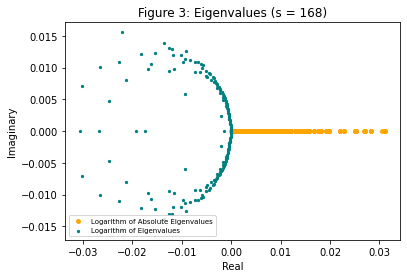

In [21]:
##PLOTTING THE EIGENVALUES (NOT CUTOFF):
#this is for observation purposes, to see the cutoff range

lib.scatter(omega1.real, omega1.imag, marker='o', c = 'orange', s = 15, label = 'Logarithm of Absolute Eigenvalues')
lib.scatter(omega_prime1.real, omega_prime1.imag, marker='o', c = 'teal', s = 5, label = 'Logarithm of Eigenvalues')

lib.margins(x=0.05,y=0.05)

lib.title("Figure 3: Eigenvalues (s = 168)")
lib.xlabel("Real")
lib.ylabel("Imaginary")

lib.legend(loc='lower left',prop={'size':7})

lib.savefig("Graph3.png")
lib.show()

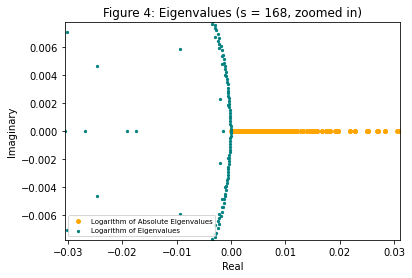

In [22]:
##ZOOMING IN:

lib.scatter(omega1.real, omega1.imag, marker='o', c = 'orange', s = 15, label = 'Logarithm of Absolute Eigenvalues')
lib.scatter(omega_prime1.real, omega_prime1.imag, marker='o', c = 'teal', s = 5, label = 'Logarithm of Eigenvalues')

lib.margins(x=0,y=-0.25) #zooming in

lib.title("Figure 4: Eigenvalues (s = 168, zoomed in)")
lib.xlabel("Real")
lib.ylabel("Imaginary")

lib.legend(loc='lower left',prop={'size':7})

lib.savefig("Graph4.png")
lib.show()

In [23]:
##CUTTING-OFF EIGENVALUES:
#reasonable cut off = 0.0001, considering the clustering of the eigenvalues at 0
#separating the eigendecompositional matrix into fast and slow modes

fast1 = np.zeros([168,1])
slow1 = np.zeros([168,1])
#empty array designated towards including 'fast' modes

fast_index1 = 0
slow_index1 = 0
i = 0

slow_position1 = 0

for element in omega1:
    if element > 0.0001: #leads to a single mode showing up in the low rank
    #if element > 0.001: #leads to 7 modes showing up in the low rank - with no change on the result
        #constructed a larger cutoff point to demonstate what happens when more eigenvalues go into the background
        fast1[fast_index1] = element
        fast_index1 = fast_index1 + 1
        i += 1
    else:
        slow1[slow_index1] = element
        slow_index1 = slow_index1 + 1
        slow_position1 = i
        i += 1
        
print(fast_index1, slow_index1)
print(fast1)
print(slow1)
print(i)
print("The index of the slow mode is: ", slow_position1)
print("The slow mode is the 134 element in omega")
#this means that the element with index 22 in the coefficient matrix is the coefficient for the slow eigendecomposition

167 1
[[0.02706932]
 [0.02706932]
 [0.01951137]
 [0.01951137]
 [0.03104371]
 [0.03104371]
 [0.02831609]
 [0.02831609]
 [0.03055171]
 [0.02528299]
 [0.02528299]
 [0.02196262]
 [0.02196262]
 [0.02683612]
 [0.0182518 ]
 [0.0182518 ]
 [0.01767   ]
 [0.01767   ]
 [0.01972756]
 [0.01972756]
 [0.02510135]
 [0.02510135]
 [0.0227415 ]
 [0.0227415 ]
 [0.01555381]
 [0.01555381]
 [0.01946229]
 [0.01946229]
 [0.01579522]
 [0.01579522]
 [0.0167894 ]
 [0.0167894 ]
 [0.01941943]
 [0.01941943]
 [0.01467839]
 [0.01467839]
 [0.01921921]
 [0.01456564]
 [0.01456564]
 [0.01391708]
 [0.01391708]
 [0.0128356 ]
 [0.0128356 ]
 [0.01320373]
 [0.01320373]
 [0.01748456]
 [0.01572539]
 [0.01572539]
 [0.01510787]
 [0.01510787]
 [0.01216288]
 [0.01216288]
 [0.01183311]
 [0.01183311]
 [0.01158218]
 [0.01158218]
 [0.01194073]
 [0.01194073]
 [0.01120569]
 [0.01120569]
 [0.01076152]
 [0.01076152]
 [0.01023834]
 [0.01023834]
 [0.00994649]
 [0.00994649]
 [0.01015005]
 [0.01015005]
 [0.01113395]
 [0.01113395]
 [0.0097758 ]


In [24]:
##RECONSTRUCTING THE FOREGROUND AND BACKGROUND - PART I:

#FOREGROUND - X_FAST
import copy
fast_C1 = copy.deepcopy(C_new1)
fast_C1[133] = 0

print(fast_C1)
print(fast_C1[133])
print(C_new1[133])

Zn_fast1 = np.empty([168,454], dtype = np.cdouble)
decomp_new1 = np.empty([168,1], dtype = np.cdouble)
#defining number of rows as p-rank and number of columns as frames
decomp_new1.reshape(168,1)

for n in range(454):
    for m in range(167): #as the first row is 0
        decomp_new1 = decomp_new1 + (((eigenva1[m+1])**(n+1))*(fast_C1[m+1])*eigenvectors1[:,[m+1]]) #using [m+1] as it is the only way to get around ValueError: could not broadcast input array from shape (168,168) into shape (168,)
    Zn_fast1[:,[n]] = decomp_new1
    decomp_new1 = np.empty([168,1]) #to initialize next column of Zn_fast

print(Zn1.shape)
print(Zn_fast1.shape)
print(Zn_fast1)

[[ 5.33755224e+01-7.45402251e+01j]
 [ 5.33755224e+01+7.45402251e+01j]
 [-1.24021452e+02-1.30037020e+02j]
 [-1.24021452e+02+1.30037020e+02j]
 [-1.77748785e+02+6.17295299e+01j]
 [-1.77748785e+02-6.17295299e+01j]
 [ 8.04539048e+01+9.84054799e+00j]
 [ 8.04539048e+01-9.84054799e+00j]
 [ 3.28999809e+02+1.10637381e-09j]
 [ 2.31999955e+02-2.01799040e+01j]
 [ 2.31999955e+02+2.01799040e+01j]
 [-3.18822419e+02+6.84798518e+02j]
 [-3.18822419e+02-6.84798518e+02j]
 [ 4.68604360e+02-7.93881203e-10j]
 [ 1.22382755e+02+5.01574909e+02j]
 [ 1.22382755e+02-5.01574909e+02j]
 [-1.24504618e+02+7.47088647e+01j]
 [-1.24504618e+02-7.47088647e+01j]
 [ 3.65621542e+02-2.08843748e+02j]
 [ 3.65621542e+02+2.08843748e+02j]
 [ 4.79566792e+02-1.00946111e+03j]
 [ 4.79566792e+02+1.00946111e+03j]
 [ 6.36279577e+01-8.69803254e+02j]
 [ 6.36279577e+01+8.69803254e+02j]
 [-5.45580254e+01+5.92990295e+01j]
 [-5.45580254e+01-5.92990295e+01j]
 [ 1.13258233e+03+2.08195772e+03j]
 [ 1.13258233e+03-2.08195772e+03j]
 [-3.85181923e+02+4.

In [25]:
##RECONSTRUCTING THE FOREGROUND AND BACKGROUND - PART II:

#BACKGROUND - X_SLOW

Zn_slow1 = np.subtract(Zn1, Zn_fast1)

print(Zn_slow1.shape)
print(Zn_slow1)

(168, 454)
[[-6.75076043e+004-2.27373675e-11j -6.75648892e+004-2.36468622e-11j
  -6.75154232e+004-2.27373675e-11j ... -6.93472618e+004-2.39310793e-11j
  -6.92978990e+004-2.39310793e-11j -6.93019120e+004-2.39310793e-11j]
 [ 1.84115291e+003+0.00000000e+00j  1.78788401e+003+0.00000000e+00j
   1.84136616e+003+0.00000000e+00j ...  1.83649513e+003+6.53699317e-13j
   1.88998010e+003+6.53699317e-13j  1.89008954e+003+6.53699317e-13j]
 [-1.28027340e+003+0.00000000e+00j -1.40436899e+003+0.00000000e+00j
  -1.28042168e+003+0.00000000e+00j ... -1.19012856e+003-4.54747351e-13j
  -1.31422612e+003-4.54747351e-13j -1.31430222e+003-4.54747351e-13j]
 ...
 [-1.11197472e+000+0.00000000e+00j  2.95257646e+179+0.00000000e+00j
  -1.11644102e+004+0.00000000e+00j ...  2.95257646e+179-3.88578059e-16j
   2.95257646e+179-3.88578059e-16j  2.95257646e+179-3.88578059e-16j]
 [-4.36800437e+000+0.00000000e+00j -5.57869781e+003+0.00000000e+00j
  -4.36851028e+000+0.00000000e+00j ... -5.57881313e+003-1.55431223e-15j
  -4.483

In [26]:
##CONSTRUCTING THE R MATRIX - PART I: MERCI NADA!

absZn_slow1 = np.abs(Zn_slow1)
LabsZn_slow1 = np.zeros([518400, 454])

for i in range(454):
    for j in range(168):
        LabsZn_slow1[j][i] = absZn_slow1[j][i]

print(LabsZn_slow1.shape)
print(LabsZn_slow1)

(518400, 454)
[[67507.60430397 67564.88915862 67515.42319493 ... 69347.2617653
  69297.89901794 69301.91202531]
 [ 1841.15291049  1787.8840084   1841.36615719 ...  1836.49513223
   1889.98009607  1890.08954389]
 [ 1280.27339895  1404.36899132  1280.42168325 ...  1190.12856349
   1314.22611764  1314.30222383]
 ...
 [    0.             0.             0.         ...     0.
      0.             0.        ]
 [    0.             0.             0.         ...     0.
      0.             0.        ]
 [    0.             0.             0.         ...     0.
      0.             0.        ]]


In [27]:
##CONSTRUCTING THE R MATRIX - PART II:

sparse1 = np.subtract(XT_grey1,LabsZn_slow1)
#must subtract the slow from the transposed video data

print(sparse1.shape)
print(sparse1)

R1 = np.zeros([518400,454], dtype = 'float')

for j in range(454):
    for l in range(168):
        if sparse1[l][j] < 0.00:
            R1[l][j] = sparse1[l][j] #double indices due to 2-D array
    
print(R1.shape)
print(R1)

(518400, 454)
[[-67507.60430397 -67564.88915862 -67515.42319493 ... -69347.2617653
  -69297.89901794 -69301.91202531]
 [ -1841.15291049  -1787.8840084   -1841.36615719 ...  -1836.49513223
   -1889.98009607  -1890.08954389]
 [ -1280.27339895  -1404.36899132  -1280.42168325 ...  -1190.12856349
   -1314.22611764  -1314.30222383]
 ...
 [     0.              0.              0.         ...      0.
       0.              0.        ]
 [     0.              0.              0.         ...      0.
       0.              0.        ]
 [     0.              0.              0.         ...      0.
       0.              0.        ]]
(518400, 454)
[[-67507.60430397 -67564.88915862 -67515.42319493 ... -69347.2617653
  -69297.89901794 -69301.91202531]
 [ -1841.15291049  -1787.8840084   -1841.36615719 ...  -1836.49513223
   -1889.98009607  -1890.08954389]
 [ -1280.27339895  -1404.36899132  -1280.42168325 ...  -1190.12856349
   -1314.22611764  -1314.30222383]
 ...
 [     0.              0.              0. 

In [28]:
##FINALIZING SLOW AND FAST MODES:

lowrank1 = np.add(R1, LabsZn_slow1)
final_sparse1 = np.subtract(sparse1, R1) #as described in the methodology

print(lowrank1.shape)
print(lowrank1)
print(final_sparse1.shape)
print(final_sparse1)

(518400, 454)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(518400, 454)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [29]:
##RECONSTRUCTING VIDEO:
#now, lowrank and final_sparse should no longer contain negative values

print(XT_grey1.shape)
print(XT_grey1)

RECON_VIDEO1 = np.add(lowrank1, final_sparse1)

print(RECON_VIDEO1.shape)
print(RECON_VIDEO1)

(518400, 454)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(518400, 454)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [30]:
from PIL import Image as im #importing module to view frames as images

In [31]:
##FRAME IMAGES - PART I:
#image 1 - one of the first frames

RECON_IM11 = RECON_VIDEO1[:,[2]]
RECON_IM11.shape
RECON_IM11 = RECON_IM11.reshape(540,960)

IM11 = im.fromarray(RECON_IM11)
IM11 = IM11.convert("L") #solves OSError: cannot write mode F as PNG (must use this for greyscale images)

IM11.save("IM11.png")

In [32]:
##FRAME IMAGES - PART II:
#image 2 - one of the last frames

RECON_IM21 = RECON_VIDEO1[:,[450]]
RECON_IM21.shape
RECON_IM21 = RECON_IM21.reshape(540,960)

IM21 = im.fromarray(RECON_IM21)
IM21 = IM21.convert("L") #solves OSError: cannot write mode F as PNG (must use this for greyscale images)

IM21.save("IM21.png")

In [33]:
##RECONSTRUCTING FRAME IMAGES - PART I: LOW RANK
#image 3 - one of the first frames

LOW_IM11 = lowrank1[:,[2]]
LOW_IM11.shape
LOW_IM11 = LOW_IM11.reshape(540,960)

LIM11 = im.fromarray(LOW_IM11)
LIM11 = LIM11.convert("L") #solves OSError: cannot write mode F as PNG (must use this for greyscale images)

LIM11.save("LIM11.png")

In [34]:
##RECONSTRUCTING FRAME IMAGES - PART II: LOW RANK
#image 4 - one of the first frames

LOW_IM21 = lowrank1[:,[450]]
LOW_IM21.shape
LOW_IM21 = LOW_IM21.reshape(540,960)

LIM21 = im.fromarray(LOW_IM21)
LIM21 = LIM21.convert("L") #solves OSError: cannot write mode F as PNG (must use this for greyscale images)

LIM21.save("LIM21.png")

In [35]:
##RECONSTRUCTING FRAME IMAGES - PART I: SPARSE
#image 5 - one of the first frames

S_IM11 = final_sparse1[:,[2]]
S_IM11.shape
S_IM11 = S_IM11.reshape(540,960)

SIM11 = im.fromarray(S_IM11)
SIM11 = SIM11.convert("L") #solves OSError: cannot write mode F as PNG (must use this for greyscale images)

SIM11.save("SIM11.png")

In [36]:
##RECONSTRUCTING FRAME IMAGES - PART II: SPARSE
#image 6 - one of the first frames

S_IM21 = final_sparse1[:,[450]]
S_IM21.shape
S_IM21 = S_IM21.reshape(540,960)

SIM21 = im.fromarray(S_IM21)
SIM21 = SIM21.convert("L") #solves OSError: cannot write mode F as PNG (must use this for greyscale images)

SIM21.save("SIM21.png")

In [37]:
#THE FRAMES MUST BE RECONSTRUCTED SO WE MAY PROVE FOREGOUND/BACKGROUND VISUALLY - ARRAY TO SNAPSHOT/VIDEO
#FINALIZE GRAPHS AND LABEL EVERYTHING!

In [38]:
"""

##RECONSTRUCTING THE FRAMES:

VIDEO = np.transpose(RECON_VIDEO)

print(VIDEO.shape)

"""

'\n\n##RECONSTRUCTING THE FRAMES:\n\nVIDEO = np.transpose(RECON_VIDEO)\n\nprint(VIDEO.shape)\n\n'

In [39]:
"""

##PRINTING THE FRAMES FROM THE MATRICES: ATTEMPT (FAILED)
#as matrix multiplication is distributive, can multiply by U_new now

print(buffer_grey.shape)
original_video = np.reshape(XT_grey, [height, width, frames])
print(original_video.shape)

final_video = np.reshape(VIDEO, (frames, height, width, 1))
print(final_video.shape)

fourcc = cv.VideoWriter_fourcc(*'MP42') #fourCC is a 4-byte code used to specify the video codec.

FVIDEO = cv.VideoWriter('final_video.mp4', fourcc, float(379/6), (960, 540))
FVIDEO.release()

np.save('final_video.mp4', FVIDEO)

"""

"\n\n##PRINTING THE FRAMES FROM THE MATRICES: ATTEMPT (FAILED)\n#as matrix multiplication is distributive, can multiply by U_new now\n\nprint(buffer_grey.shape)\noriginal_video = np.reshape(XT_grey, [height, width, frames])\nprint(original_video.shape)\n\nfinal_video = np.reshape(VIDEO, (frames, height, width, 1))\nprint(final_video.shape)\n\nfourcc = cv.VideoWriter_fourcc(*'MP42') #fourCC is a 4-byte code used to specify the video codec.\n\nFVIDEO = cv.VideoWriter('final_video.mp4', fourcc, float(379/6), (960, 540))\nFVIDEO.release()\n\nnp.save('final_video.mp4', FVIDEO)\n\n"

In [40]:
"""

##RECONSTRUCTING THE FRAMES: ATTEMPT (FAILED)

U_new = np.resize(U, (518400,156)) #this serves to truncate U to have the significant values
print(U_new.shape)

Zn = np.load("Zn.npy")
print(Zn.shape)

RECON = np.matmul(U_new,Zn)

print(RECON.shape)
print(RECON)

RECON_FAST = np.matmul(U_new,final_sparse)
RECON_SLOW = np.matmul(U_new,lowrank)

print(RECON_FAST.shape)
print(RECON_SLOW.shape)

"""

'\n\n##RECONSTRUCTING THE FRAMES: ATTEMPT (FAILED)\n\nU_new = np.resize(U, (518400,156)) #this serves to truncate U to have the significant values\nprint(U_new.shape)\n\nZn = np.load("Zn.npy")\nprint(Zn.shape)\n\nRECON = np.matmul(U_new,Zn)\n\nprint(RECON.shape)\nprint(RECON)\n\nRECON_FAST = np.matmul(U_new,final_sparse)\nRECON_SLOW = np.matmul(U_new,lowrank)\n\nprint(RECON_FAST.shape)\nprint(RECON_SLOW.shape)\n\n'

In [41]:
"""

#determining the type of data, in order to ensure the information is properly organized:
#this was useful for the RGB and hexadecimal trials
print(type(X.shape[0]))
print(type(X.shape[1]))
print(type(X.shape[2]))

"""

'\n\n#determining the type of data, in order to ensure the information is properly organized:\n#this was useful for the RGB and hexadecimal trials\nprint(type(X.shape[0]))\nprint(type(X.shape[1]))\nprint(type(X.shape[2]))\n\n'

In [42]:
"""

##ATTEMPT : STACKING RGB ROWS (FAILED)
#it has failed as it never stopped running - there are too many data points and 16 Go of RAM is not enough to run the reshaping of each pixel

#turning a 3-D matrix into a 2-D matrix (maintaining RGB):
print(X[0].shape)
print(X[0][0])
print(np.reshape(X[0][0],(3,1)))

#print(np.append(np.reshape(X[0][0],(3,1)),np.reshape(X[0][0],(3,1)),0)) #attempt on a single pixel

X_new = np.empty((frames,X[0].shape[0]*X[0].shape[1]),np.dtype('uint8'))

for frame in X:
    temp_frame = np.empty((1,X[0].shape[0]*X[0].shape[1]),np.dtype('uint8'))
    for pixel in frame:
        np.reshape(pixel,(3,1))
        np.append(temp_frame,pixel)
    
    np.append(X_new,temp_frame,axis=0)
    
    print(temp_frame)

print(X_new.shape)
print(X_new)

"""

"\n\n##ATTEMPT : STACKING RGB ROWS (FAILED)\n#it has failed as it never stopped running - there are too many data points and 16 Go of RAM is not enough to run the reshaping of each pixel\n\n#turning a 3-D matrix into a 2-D matrix (maintaining RGB):\nprint(X[0].shape)\nprint(X[0][0])\nprint(np.reshape(X[0][0],(3,1)))\n\n#print(np.append(np.reshape(X[0][0],(3,1)),np.reshape(X[0][0],(3,1)),0)) #attempt on a single pixel\n\nX_new = np.empty((frames,X[0].shape[0]*X[0].shape[1]),np.dtype('uint8'))\n\nfor frame in X:\n    temp_frame = np.empty((1,X[0].shape[0]*X[0].shape[1]),np.dtype('uint8'))\n    for pixel in frame:\n        np.reshape(pixel,(3,1))\n        np.append(temp_frame,pixel)\n    \n    np.append(X_new,temp_frame,axis=0)\n    \n    print(temp_frame)\n\nprint(X_new.shape)\nprint(X_new)\n\n"

In [43]:
"""

#installing library necessary for hexadecimal: (FAILED - SEE BELOW)
! pip install matplotlib.colors
from matplotlib.colors import rgb2hex

"""

'\n\n#installing library necessary for hexadecimal: (FAILED - SEE BELOW)\n! pip install matplotlib.colors\nfrom matplotlib.colors import rgb2hex\n\n'

In [44]:
"""

##TURNING RGB TO HEX (FAILED)

#turning a 3-D matrix into a 2-D matrix (hex):
print(X.shape)
print(X[0].shape)

X_new = np.empty((frames,X[0].shape[0]*X[0].shape[1]),np.dtype('uint32')) #as hex is the hexademical system, 'uint16' must be used

for frame in X:
    temp_frame = np.empty((1,X[0].sh1ape[0]*X[0].shape[1]),np.dtype('uint32'))
    for pixel in frame:
        rgb2hex(pixel/255) #due to value error: RGBA values should be within 0-1 range
        np.append(temp_frame,pixel)
    
    np.append(X_new,temp_frame,axis=0)
    
    #print(temp_frame)

print(X_new.shape)
#print(X_new)

"""

"\n\n##TURNING RGB TO HEX (FAILED)\n\n#turning a 3-D matrix into a 2-D matrix (hex):\nprint(X.shape)\nprint(X[0].shape)\n\nX_new = np.empty((frames,X[0].shape[0]*X[0].shape[1]),np.dtype('uint32')) #as hex is the hexademical system, 'uint16' must be used\n\nfor frame in X:\n    temp_frame = np.empty((1,X[0].sh1ape[0]*X[0].shape[1]),np.dtype('uint32'))\n    for pixel in frame:\n        rgb2hex(pixel/255) #due to value error: RGBA values should be within 0-1 range\n        np.append(temp_frame,pixel)\n    \n    np.append(X_new,temp_frame,axis=0)\n    \n    #print(temp_frame)\n\nprint(X_new.shape)\n#print(X_new)\n\n"